# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Achmad Fauzihan Bagus Sajiwo
- Email: achmadfauzihanbagussajiwo@gmail.com
- Id Dicoding: A296YBF008

## Persiapan

### Menyiapkan library yang dibutuhkan

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import warnings
import joblib

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
warnings.filterwarnings("ignore")

### Menyiapkan data yang akan diguankan

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
employee = pd.read_csv('employee_data.csv')

## Data Understanding

In [5]:
employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [6]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [7]:
employee.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## Data Visualitation

In [8]:
# Mengubah 1.0 ke 'Yes' dan 0.0 ke 'No'
employee['Attrition'] = employee['Attrition'].replace({1.0: 'Yes', 0.0: 'No'})

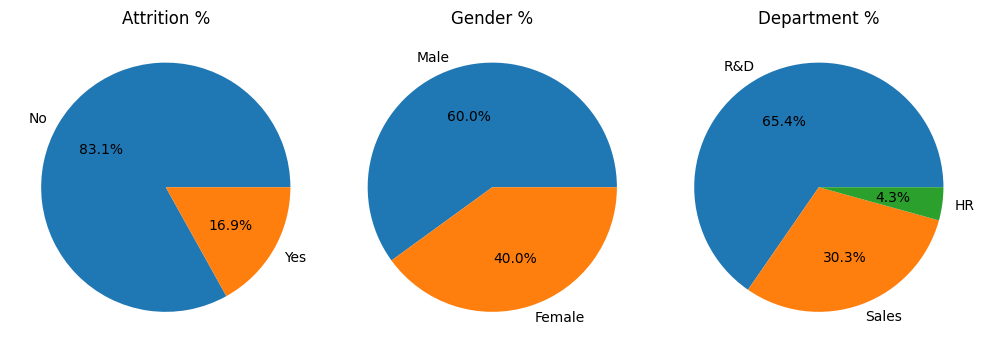

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Pie chart pertama: Attrition
attr_counts = employee['Attrition'].value_counts()
axes[0].pie(attr_counts, autopct='%1.1f%%', labels=['No', 'Yes'])
axes[0].set_title('Attrition %')

# Pie chart kedua: Gender
gndr_counts = employee['Gender'].value_counts()
axes[1].pie(gndr_counts, autopct='%1.1f%%', labels=['Male', 'Female'])
axes[1].set_title('Gender %')

# Pie chart ketiga: Department
dept_counts = employee['Department'].value_counts()
axes[2].pie(dept_counts, autopct='%1.1f%%', labels=['R&D', 'Sales', 'HR'])
axes[2].set_title('Department %')

# Menampilkan plot
plt.tight_layout()
plt.show()

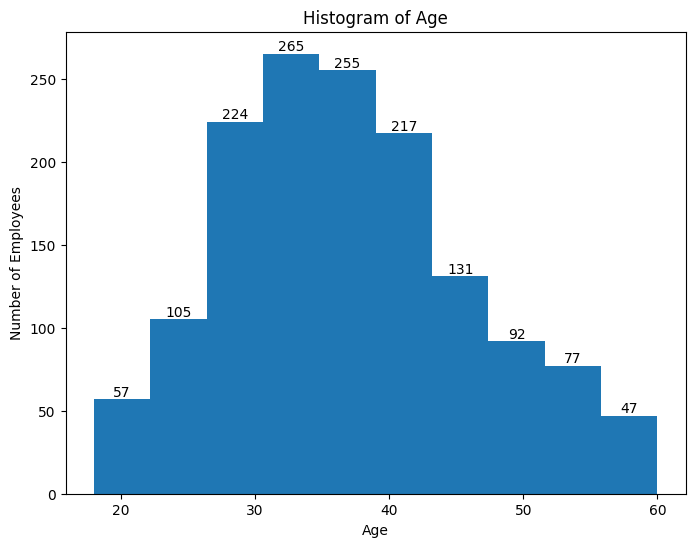

In [10]:
fig, ax = plt.subplots(figsize = (8,6))
counts, edges, bars = ax.hist(employee['Age'])
plt.ylabel('Number of Employees')
plt.xlabel('Age')
plt.title('Histogram of Age')
plt.bar_label(bars)

plt.show()

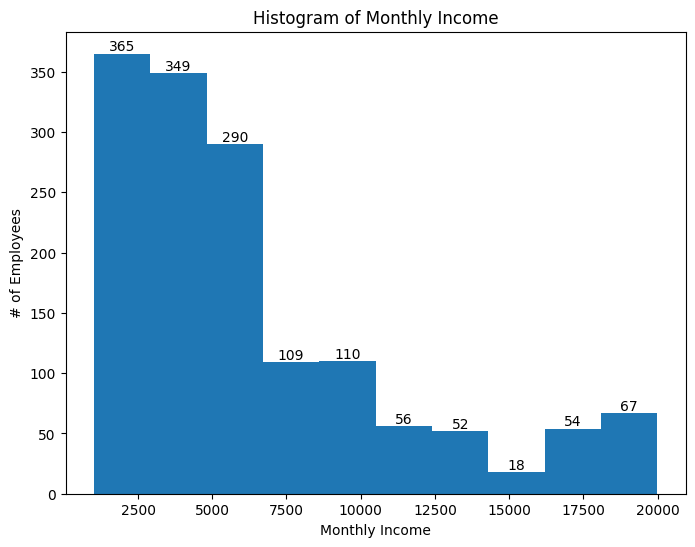

In [11]:
fig, ax = plt.subplots(figsize = (8,6))
counts, edges, bars = ax.hist(employee['MonthlyIncome'])
plt.ylabel('# of Employees')
plt.xlabel('Monthly Income')
plt.title('Histogram of Monthly Income')
plt.bar_label(bars)

plt.show()

## Data Preparation / Preprocessing

In [12]:
employee.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [13]:
employee = employee.dropna()

In [14]:
employee['Attrition'] = employee.Attrition.astype("category").cat.codes

In [15]:
employee = employee.drop(columns=['StandardHours','EmployeeCount','Over18','StockOptionLevel'])

In [16]:
categorical_col = []
for column in employee.columns:
    if employee[column].dtype == object and len(employee[column].unique()) <= 50:
        categorical_col.append(column)

In [17]:
# Menampilkan beberapa isi dari kolom-kolom kategori
for col in categorical_col:
    print(f"Kolom: {col}")
    print(employee[col].unique())  # Menampilkan nilai unik
    print("-" * 40)

Kolom: BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Kolom: Department
['Research & Development' 'Sales' 'Human Resources']
----------------------------------------
Kolom: EducationField
['Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources' 'Other']
----------------------------------------
Kolom: Gender
['Female' 'Male']
----------------------------------------
Kolom: JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Human Resources' 'Sales Representative']
----------------------------------------
Kolom: MaritalStatus
['Married' 'Single' 'Divorced']
----------------------------------------
Kolom: OverTime
['No' 'Yes']
----------------------------------------


### Encoding

In [18]:
label = LabelEncoder()
for column in categorical_col:
    employee[column] = label.fit_transform(employee[column])

### Data Splitting

In [19]:
X = employee.drop('Attrition', axis=1)
y = employee.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

### KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print("Train set Accuracy:"+str(accuracy_score(y_train, knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test, knn.predict(X_test))*100))

Train set Accuracy:84.32432432432432
Test Set Accuracy:80.81761006289308


### Random Forest

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_acc=accuracy_score(y_test,rf.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,rf.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,rf.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:84.59119496855347


### SVM

In [22]:
svm = SVC()
svm.fit(X_train, y_train)

svm_acc = accuracy_score(y_test, svm.predict(X_test))

print("Train Set Accuracy:" + str(accuracy_score(y_train, svm.predict(X_train)) * 100))
print("Test Set Accuracy:" + str(accuracy_score(y_test, svm.predict(X_test)) * 100))

Train Set Accuracy:83.24324324324324
Test Set Accuracy:82.70440251572327


## Evaluation

In [23]:
models = pd.DataFrame({'Model': ['KNN', 'Random Forest Classifier', 'SVC'], 'Accuracy': [ knn_acc, rf_acc, svm_acc]})

models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
1,Random Forest Classifier,0.845912
2,SVC,0.827044
0,KNN,0.808176


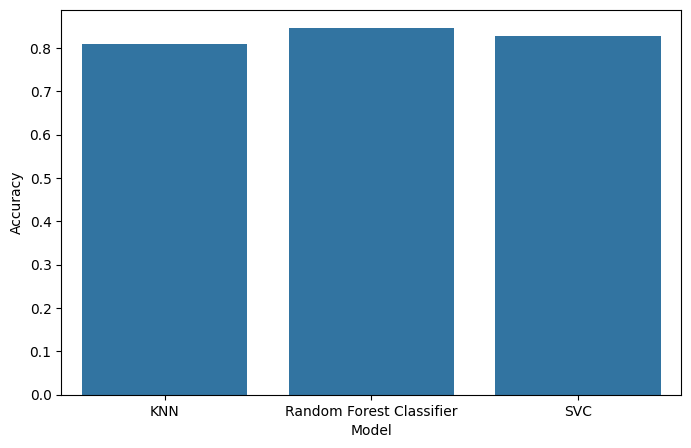

In [24]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Model', y = 'Accuracy', data = models)
plt.show()

### KNN

In [25]:
# Prediksi data test
y_pred_knn = knn.predict(X_test)

# Tampilkan classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       263
           1       0.29      0.07      0.12        55

    accuracy                           0.81       318
   macro avg       0.56      0.52      0.50       318
weighted avg       0.74      0.81      0.76       318



### Random Forest

In [26]:
# Prediksi data test
y_pred_rf = rf.predict(X_test)

# Tampilkan classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       263
           1       1.00      0.11      0.20        55

    accuracy                           0.85       318
   macro avg       0.92      0.55      0.56       318
weighted avg       0.87      0.85      0.79       318



### SVM

In [27]:
# Prediksi data test
y_pred_svm = svm.predict(X_test)

# Tampilkan classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       263
           1       0.00      0.00      0.00        55

    accuracy                           0.83       318
   macro avg       0.41      0.50      0.45       318
weighted avg       0.68      0.83      0.75       318



## Save Model

In [44]:
# Menyimpan Model sebagai File .pkl
joblib.dump(rf, "model.pkl")

['model.pkl']

## Prediction

In [45]:
# Memuat model RandomForest yang sudah disimpan
rf_job = joblib.load('model.pkl')

In [46]:
# Prediksi pada data uji (X_test)
predicted_values = rf_job.predict(X_test)

# Ambil 5 data acak dari X_test dan y_test
random_indices = X_test.sample(n=20, random_state=42).index

# Membuat DataFrame untuk perbandingan hasil prediksi dan nilai asli
comparison_df = pd.DataFrame({
    'Actual': y_test.loc[random_indices],
    'Predicted': [predicted_values[X_test.index.get_loc(i)] for i in random_indices]
})

# Menyandikan hasil dalam bentuk 'Attrition' atau 'No Attrition'
comparison_df['Actual'] = comparison_df['Actual'].apply(lambda x: 'Attrition' if x == 1 else 'No Attrition')
comparison_df['Predicted'] = comparison_df['Predicted'].apply(lambda x: 'Attrition' if x == 1 else 'No Attrition')

# Menampilkan tabel hasil perbandingan
print(comparison_df)

            Actual     Predicted
759   No Attrition  No Attrition
1001  No Attrition  No Attrition
638   No Attrition  No Attrition
841   No Attrition  No Attrition
819   No Attrition  No Attrition
1237  No Attrition  No Attrition
1067     Attrition  No Attrition
493   No Attrition  No Attrition
756   No Attrition  No Attrition
449   No Attrition  No Attrition
364   No Attrition  No Attrition
139   No Attrition  No Attrition
749   No Attrition  No Attrition
962      Attrition  No Attrition
58    No Attrition  No Attrition
1064  No Attrition  No Attrition
483   No Attrition  No Attrition
387   No Attrition  No Attrition
786   No Attrition  No Attrition
1078  No Attrition  No Attrition
